In [3]:
from src.tictactoe import TicTacToe
from src.game_manager import GameManager
from src.training_manager import TrainingManager

from src.gui import ascii_gui

training_manager = TrainingManager( game = TicTacToe(board_size  = 3, agent_count = 2),
                                    gui  = ascii_gui)

base_config = {
    "agent_types"         : ["RANDOM_AGENT", "RANDOM_AGENT"],
    "board_size"          : 3,
    "n_episode"           : 3000,   # Number of training episodes
    "n_eval"              : 100,    # Number of evaluation episodes every eval_freq training episodes
    "eval_freq"           : 100,
    "train_freq"          : 1,      # Train models every train_freq training episodes
    "grad_steps"          : 2,      # Number of gradient updates per training step
    "discount"            : 0.8,    # Discount in all Q learning algorithms
    "learning_rate_decay" : 1,
    "exploration"         : 1.0,    # Initial exploration rate
    "exploration_decay"   : 1e-2,   # Decrease of exploration rate for every action
    "exploration_min"     : 0.0,
    "learning_rate"       : 1e-2,
    "randomise_order"     : False,  # Randomise starting order of agents for every game
    "only_legal_actions"  : True,   # Have agents only take legal actions
    "debug"               : False,  # Print loss and evaluation information during training
    "batch_size"          : 128,    # Batch size for DQN algorithm
    "replay_buffer_size"  : 10000,  # Replay buffer for DQN algorithm
    "replay_buffer_min"   : 1000,   # minimum size before we start training
    "target_update_tau"   : 0.1,   # Weight for update in dual DQN architecture target = (1 - tau) * target + tau * online
    "initial_q"           : 0.6,    # Initial Q value for tabular Q learning
    "board_encoding"      : "encoding_tutorial"
}

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import src.agent_deep_q as agent_deep_q
import src.agent_random as agent_random
import src.agent_minmax as agent_minmax

def build_simple_dqn_model(input_shape, num_actions, num_hidden_layers, hidden_layer_size):
    inputs       = tf.keras.layers.Input(shape=input_shape)
    hidden_layer = inputs
    for i in range(num_hidden_layers):
        hidden_layer = tf.keras.layers.Dense(hidden_layer_size, activation='relu')(hidden_layer)
    # Linear activation for predicting arbitrary real numbers (Q values)
    outputs = tf.keras.layers.Dense(num_actions, activation='linear')(hidden_layer)
    # Create the model
    return models.Model(inputs=inputs, outputs=outputs)

2025-05-23 19:12:16.302548: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 19:12:19.834749: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 19:12:19.836815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-23 19:12:24.913956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/tmp/ipykernel_3342820/2383400212.py:34: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=optuna.samplers.GPSampler(),
[I 2025-05-23 19:14:20,936] A new study created in memory with name: no-name-3ecf3f13-e112-4975-a967-67c5b48a8061


/tmp/ipykernel_3342820/2383400212.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate"     : trial.suggest_loguniform("lr", 1e-4, 1e-2),
/tmp/ipykernel_3342820/2383400212.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "exploration_decay" : trial.suggest_loguniform("exploration_decay", 1e-4, 1e-2),
100%|██████████| 3000/3000 [04:36<00:00, 10.84it/s]


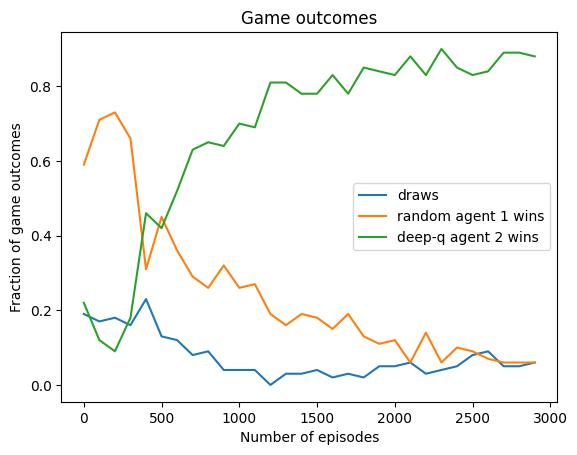

[I 2025-05-23 19:18:58,590] Trial 0 finished with value: 0.068 and parameters: {'lr': 0.00024045282810084494, 'gamma': 0.8476286273094099, 'exploration': 0.9575143005628768, 'exploration_decay': 0.0007609614735614088, 'hidden_layer_size': 64}. Best is trial 0 with value: 0.068.
100%|██████████| 3000/3000 [04:09<00:00, 12.00it/s]


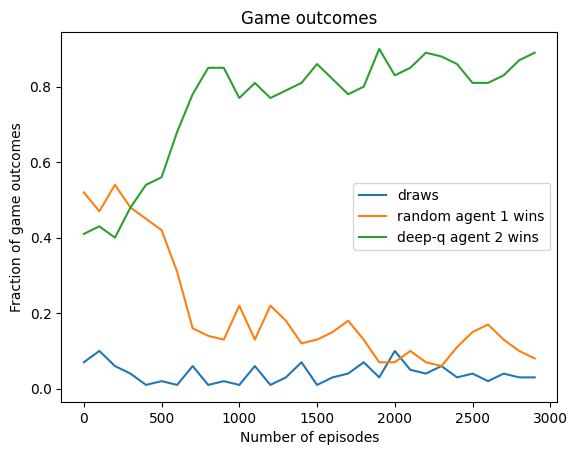

[I 2025-05-23 19:23:09,353] Trial 1 finished with value: 0.126 and parameters: {'lr': 0.00047183171387415584, 'gamma': 0.8196036537822973, 'exploration': 0.813028228688589, 'exploration_decay': 0.00616948758560757, 'hidden_layer_size': 256}. Best is trial 1 with value: 0.126.
100%|██████████| 3000/3000 [03:48<00:00, 13.12it/s]


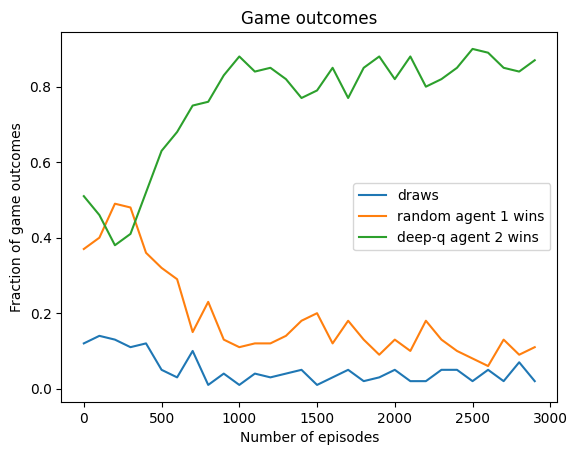

[I 2025-05-23 19:26:58,815] Trial 2 finished with value: 0.094 and parameters: {'lr': 0.00018808446047799925, 'gamma': 0.898847052847898, 'exploration': 0.9533880604626536, 'exploration_decay': 0.0014634366705845632, 'hidden_layer_size': 256}. Best is trial 1 with value: 0.126.
100%|██████████| 3000/3000 [04:06<00:00, 12.19it/s]


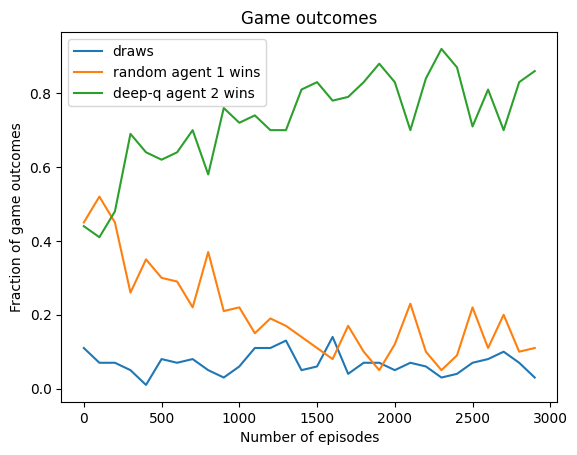

[I 2025-05-23 19:31:05,755] Trial 3 finished with value: 0.148 and parameters: {'lr': 0.009695987738334353, 'gamma': 0.8531814456604621, 'exploration': 0.8571993611108802, 'exploration_decay': 0.0036918678134944226, 'hidden_layer_size': 256}. Best is trial 3 with value: 0.148.
100%|██████████| 3000/3000 [02:27<00:00, 20.34it/s]


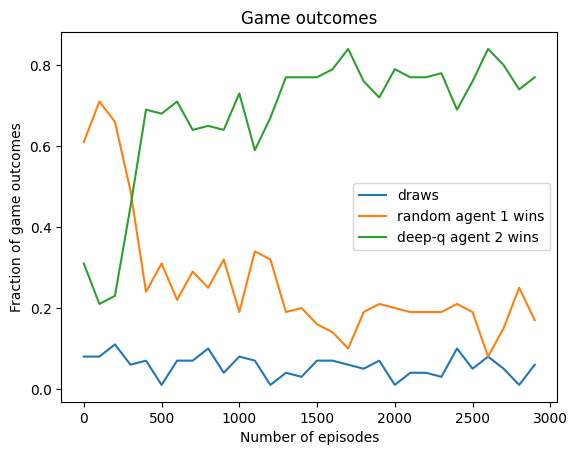

[I 2025-05-23 19:33:33,763] Trial 4 finished with value: 0.168 and parameters: {'lr': 0.005131834922619179, 'gamma': 0.9790573976476964, 'exploration': 0.6639057473259635, 'exploration_decay': 0.003789411544079584, 'hidden_layer_size': 256}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:40<00:00, 18.66it/s]


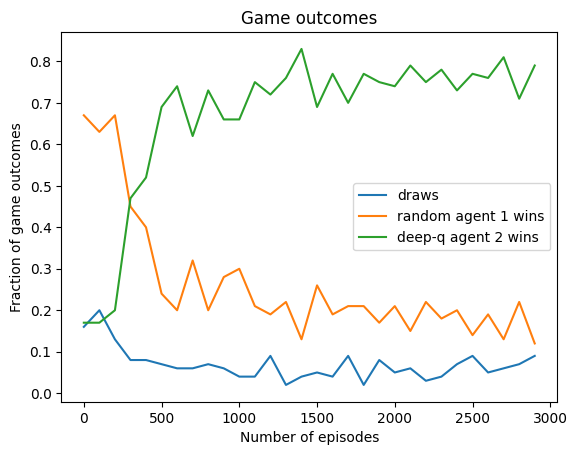

[I 2025-05-23 19:36:15,006] Trial 5 finished with value: 0.16 and parameters: {'lr': 0.008568493577443582, 'gamma': 0.8491343532213329, 'exploration': 0.9431030038050782, 'exploration_decay': 0.0024756480631453496, 'hidden_layer_size': 64}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:07<00:00, 23.57it/s]


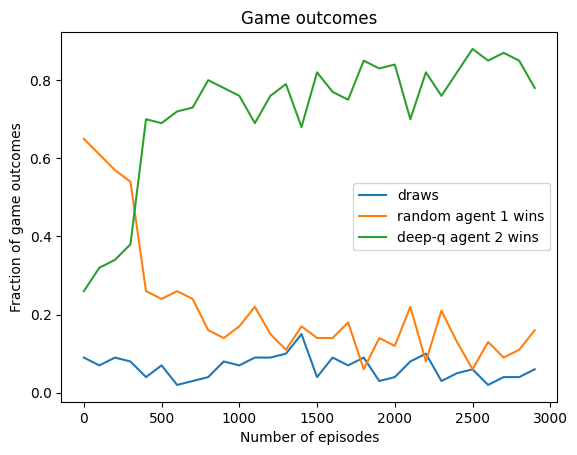

[I 2025-05-23 19:38:23,363] Trial 6 finished with value: 0.11000000000000001 and parameters: {'lr': 0.0038518639358020215, 'gamma': 0.855760621208282, 'exploration': 0.9951042346544933, 'exploration_decay': 0.0003634015685684009, 'hidden_layer_size': 64}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:08<00:00, 23.29it/s]


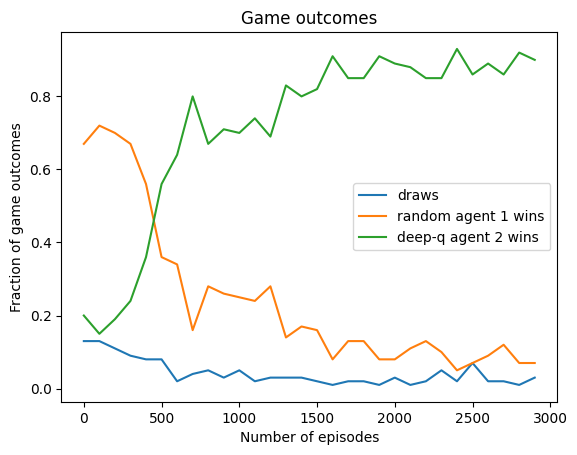

[I 2025-05-23 19:40:32,654] Trial 7 finished with value: 0.084 and parameters: {'lr': 0.0005055355491788266, 'gamma': 0.9812748575847025, 'exploration': 0.9517051897789515, 'exploration_decay': 0.0002665250312131973, 'hidden_layer_size': 64}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:34<00:00, 19.37it/s]


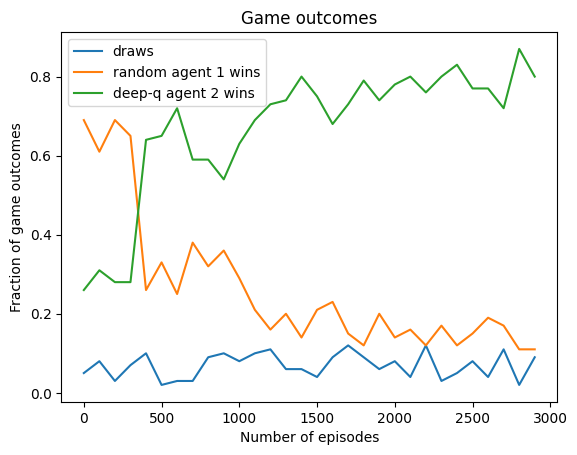

[I 2025-05-23 19:43:07,998] Trial 8 finished with value: 0.146 and parameters: {'lr': 0.006433190974539301, 'gamma': 0.8253519224245103, 'exploration': 0.9483802361568292, 'exploration_decay': 0.0001325808875971215, 'hidden_layer_size': 64}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:06<00:00, 23.72it/s]


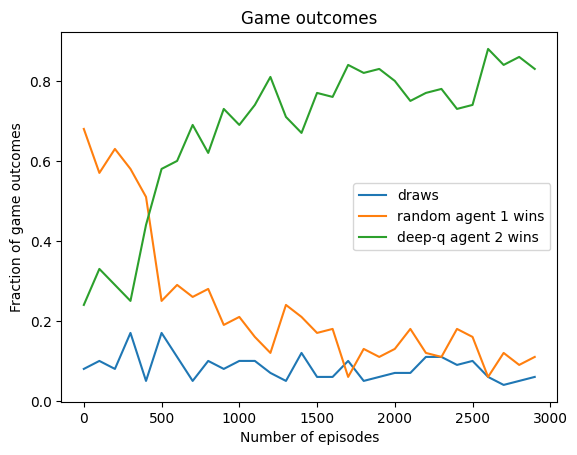

[I 2025-05-23 19:45:14,961] Trial 9 finished with value: 0.10799999999999998 and parameters: {'lr': 0.0011351530386693486, 'gamma': 0.9298961529917398, 'exploration': 0.9805432737328902, 'exploration_decay': 0.009715501302518486, 'hidden_layer_size': 256}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:01<00:00, 24.61it/s]


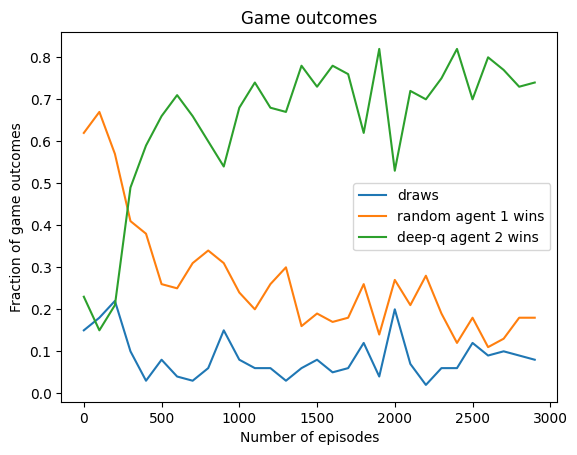

[I 2025-05-23 19:47:20,269] Trial 10 finished with value: 0.156 and parameters: {'lr': 0.01, 'gamma': 0.8709046242160292, 'exploration': 0.8131392425690056, 'exploration_decay': 0.0019430118798784409, 'hidden_layer_size': 64}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:01<00:00, 24.60it/s]


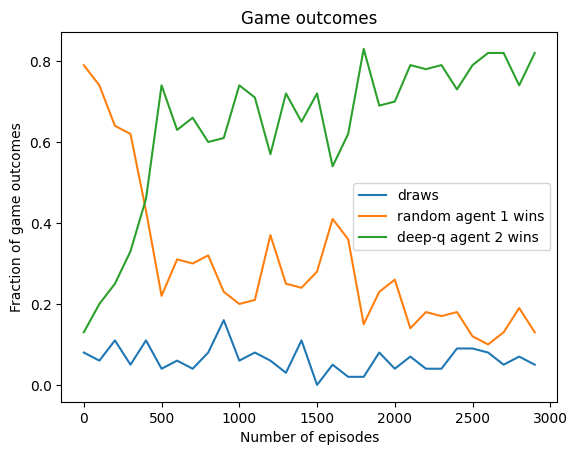

[I 2025-05-23 19:49:22,895] Trial 11 finished with value: 0.134 and parameters: {'lr': 0.008177652727459519, 'gamma': 0.99, 'exploration': 0.6, 'exploration_decay': 0.00010000000000000009, 'hidden_layer_size': 256}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:02<00:00, 24.44it/s]


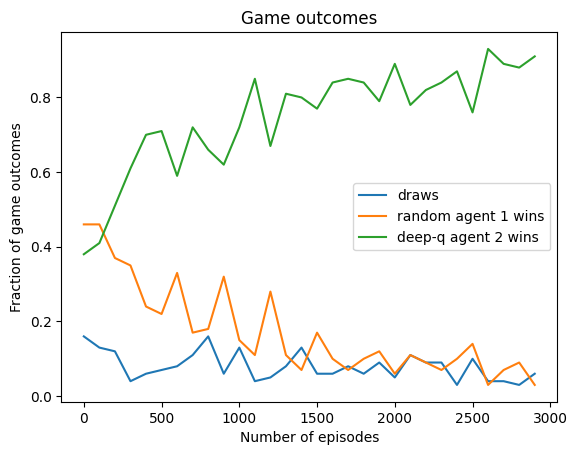

[I 2025-05-23 19:51:26,636] Trial 12 finished with value: 0.072 and parameters: {'lr': 0.002887034120053532, 'gamma': 0.99, 'exploration': 0.700777137893166, 'exploration_decay': 0.01, 'hidden_layer_size': 256}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:05<00:00, 23.99it/s]


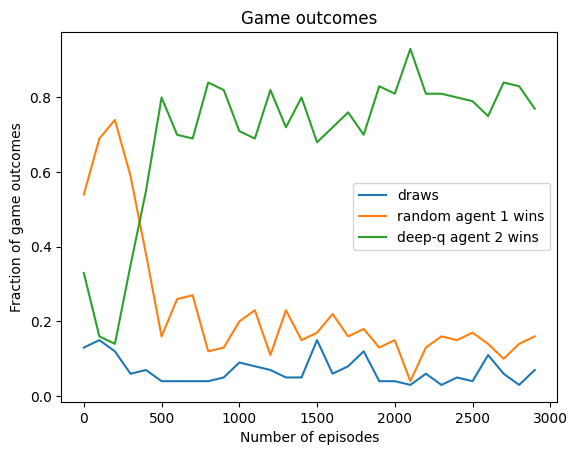

[I 2025-05-23 19:53:32,483] Trial 13 finished with value: 0.14200000000000002 and parameters: {'lr': 0.005313709755186066, 'gamma': 0.99, 'exploration': 0.6476330724609166, 'exploration_decay': 0.0026191432155637747, 'hidden_layer_size': 256}. Best is trial 4 with value: 0.168.
100%|██████████| 3000/3000 [02:03<00:00, 24.28it/s]


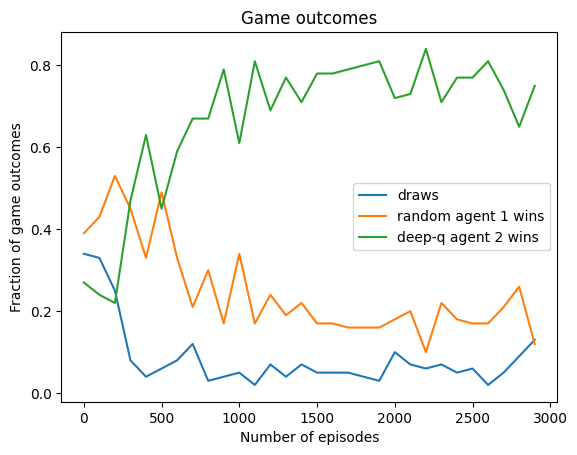

[I 2025-05-23 19:55:36,936] Trial 14 finished with value: 0.186 and parameters: {'lr': 0.009358709916130572, 'gamma': 0.9552356515420214, 'exploration': 0.6864785289552632, 'exploration_decay': 0.003648339495805757, 'hidden_layer_size': 64}. Best is trial 14 with value: 0.186.
100%|██████████| 3000/3000 [02:03<00:00, 24.38it/s]


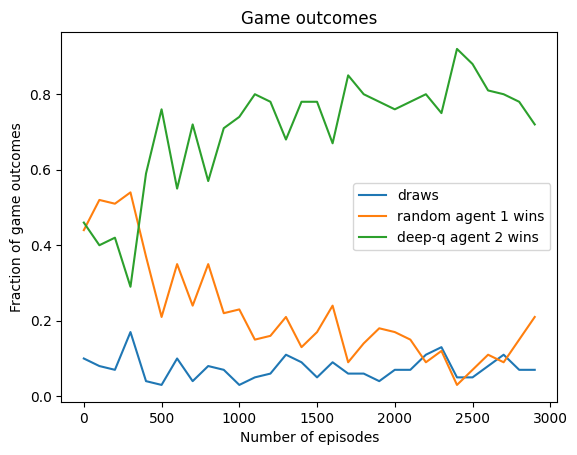

[I 2025-05-23 19:57:40,792] Trial 15 finished with value: 0.126 and parameters: {'lr': 0.01, 'gamma': 0.8658671309970405, 'exploration': 0.6, 'exploration_decay': 0.00362682743623962, 'hidden_layer_size': 64}. Best is trial 14 with value: 0.186.
100%|██████████| 3000/3000 [02:03<00:00, 24.24it/s]


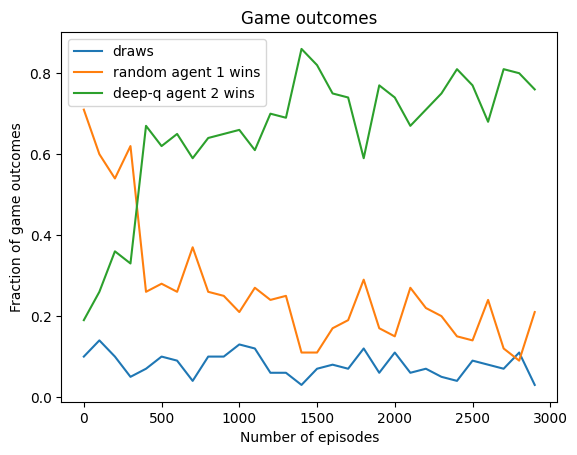

[I 2025-05-23 19:59:45,375] Trial 16 finished with value: 0.15999999999999998 and parameters: {'lr': 0.01, 'gamma': 0.9546645527761533, 'exploration': 0.8878577484456676, 'exploration_decay': 0.0035266100681863696, 'hidden_layer_size': 64}. Best is trial 14 with value: 0.186.
100%|██████████| 3000/3000 [02:02<00:00, 24.42it/s]


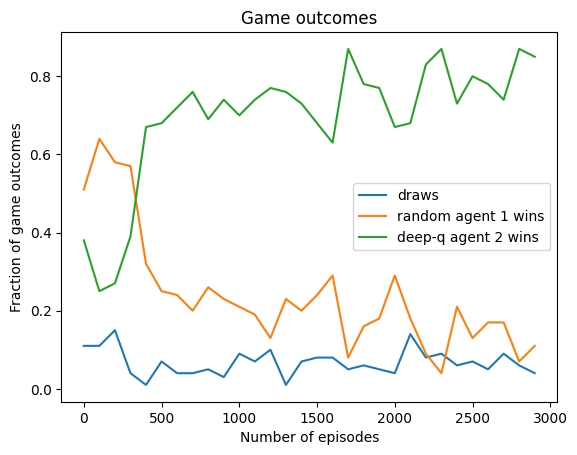

[I 2025-05-23 20:01:48,992] Trial 17 finished with value: 0.13 and parameters: {'lr': 0.01, 'gamma': 0.9731128282568884, 'exploration': 0.6007245896367835, 'exploration_decay': 0.0039840972182246534, 'hidden_layer_size': 64}. Best is trial 14 with value: 0.186.
100%|██████████| 3000/3000 [02:40<00:00, 18.67it/s]


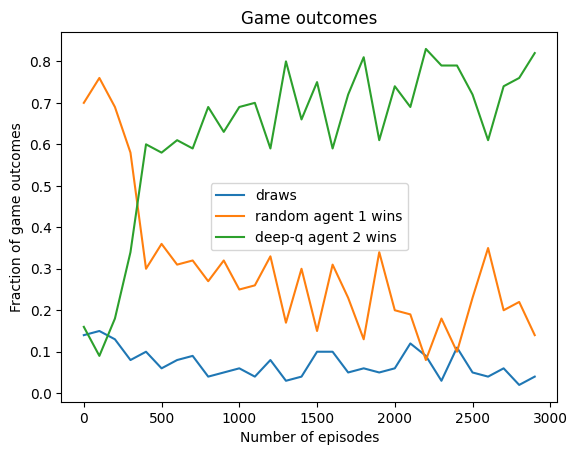

[I 2025-05-23 20:04:30,523] Trial 18 finished with value: 0.22800000000000004 and parameters: {'lr': 0.01, 'gamma': 0.99, 'exploration': 0.7305454099413864, 'exploration_decay': 0.0035464116925925937, 'hidden_layer_size': 64}. Best is trial 18 with value: 0.22800000000000004.
100%|██████████| 3000/3000 [02:43<00:00, 18.34it/s]


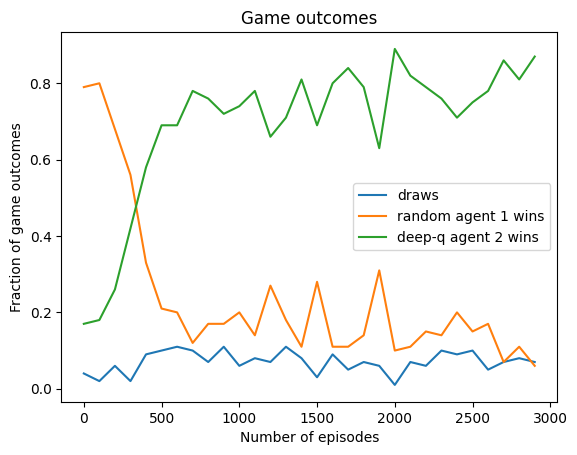

[I 2025-05-23 20:07:15,024] Trial 19 finished with value: 0.11200000000000002 and parameters: {'lr': 0.01, 'gamma': 0.99, 'exploration': 0.7563398622802004, 'exploration_decay': 0.0035274139044785824, 'hidden_layer_size': 64}. Best is trial 18 with value: 0.22800000000000004.
100%|██████████| 3000/3000 [02:42<00:00, 18.45it/s]


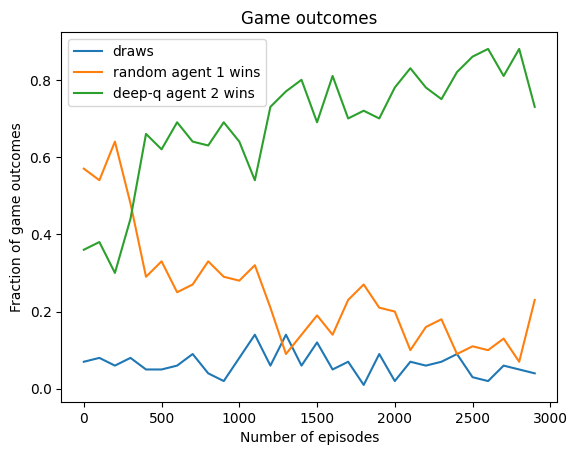

[I 2025-05-23 20:09:58,564] Trial 20 finished with value: 0.128 and parameters: {'lr': 0.01, 'gamma': 0.99, 'exploration': 0.7177434125543825, 'exploration_decay': 0.003067366553337258, 'hidden_layer_size': 64}. Best is trial 18 with value: 0.22800000000000004.
100%|██████████| 3000/3000 [02:37<00:00, 19.06it/s]


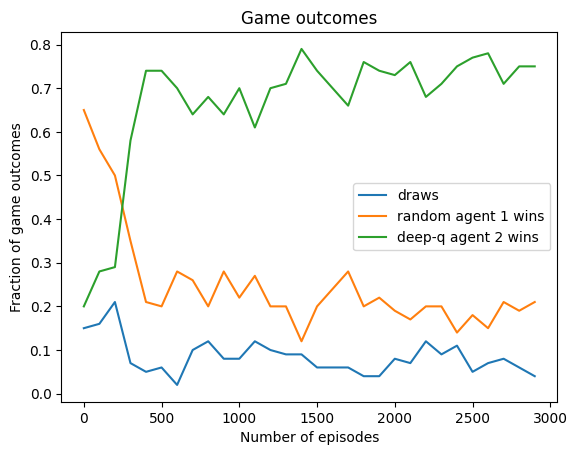

[I 2025-05-23 20:12:36,697] Trial 21 finished with value: 0.188 and parameters: {'lr': 0.01, 'gamma': 0.99, 'exploration': 1.0, 'exploration_decay': 0.00010000000000000009, 'hidden_layer_size': 256}. Best is trial 18 with value: 0.22800000000000004.
100%|██████████| 3000/3000 [02:44<00:00, 18.22it/s]


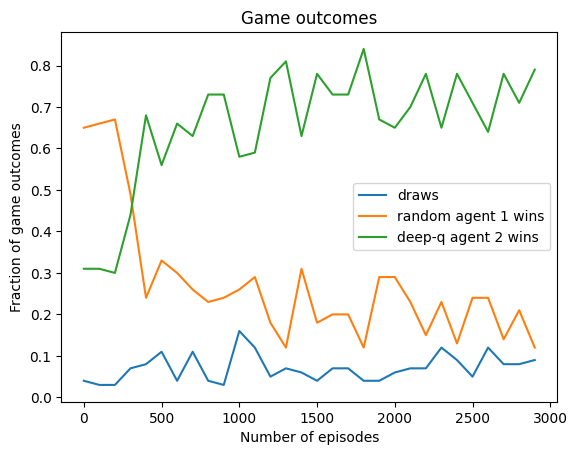

[I 2025-05-23 20:15:22,182] Trial 22 finished with value: 0.19 and parameters: {'lr': 0.009999999999999995, 'gamma': 0.99, 'exploration': 1.0, 'exploration_decay': 0.01, 'hidden_layer_size': 256}. Best is trial 18 with value: 0.22800000000000004.


Best value: 0.22800000000000004
Best params: {'lr': 0.01, 'gamma': 0.99, 'exploration': 0.7305454099413864, 'exploration_decay': 0.0035464116925925937, 'hidden_layer_size': 64}


In [5]:
import optuna
import copy, numpy as np

def objective(trial):
    cfg          = dict(base_config)      # start from your default
    cfg.update({
        # ► sampled hyper-params
        "learning_rate"     : trial.suggest_loguniform("lr", 1e-4, 1e-2),
        "discount"          : trial.suggest_float("gamma", 0.8, 0.99),
        "exploration"       : trial.suggest_float("exploration", 0.6, 1.0),
        "exploration_decay" : trial.suggest_loguniform("exploration_decay", 1e-4, 1e-2),
        "hidden_layer_size" : trial.suggest_categorical("hidden_layer_size", [64, 256])

    })

    # build agents
    rand = agent_random.RandomAgent(1, 9)
    dqn  = agent_deep_q.DeepQAgent(2, 9, 3**9, cfg)
    dqn.online_model = build_simple_dqn_model(dqn.input_shape, dqn.n_actions, num_hidden_layers=1, hidden_layer_size=cfg["hidden_layer_size"])
    # Compile the model
    dqn.online_model.compile(optimizer=keras.optimizers.Adam(learning_rate=dqn.learning_rate), loss='mse')
    dqn.target_model = dqn.online_model



    agents, _, victories, _ = training_manager.run_training(cfg, agents=[rand, dqn])

    # metric = mean win-rate of DQN over last 5 eval blocks
    score = victories[-5:, 0].mean()
    return score                    # Optuna maximises by default if you set direction

study = optuna.create_study(
            direction="maximize",
            sampler=optuna.samplers.GPSampler(),
            pruner =optuna.pruners.HyperbandPruner()
        )
study.optimize(objective, n_trials=100, timeout=60*60)  # 40 trials or 1 h

print("Best value:", study.best_value)
print("Best params:", study.best_params)
